In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()
# We only take the first two
# features for simplicity
X = iris.data[:, :2]
y = iris.target
# Fit the SVM model
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)
# Predict using the SVM model
predictions = model.predict(X)
# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)

In [ ]:
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)

In [3]:
import pickle
import joblib

In [4]:
m_svc_pickle = 'modelis_pickle.pkl'

with open(m_svc_pickle, mode='wb') as file:
    pickle.dump(model, file)
    


In [5]:
with open(m_svc_pickle, mode='rb') as file:
    modelis = pickle.load(file)

In [ ]:
modelis.predict(X)

In [ ]:
import os
print(os.getcwd())  # cia issaugo faila

In [ ]:
joblib.dump(model, 'modelisJoblib.jblib')

In [9]:
loadedmodel = joblib.load('modelisJoblib.jblib')

In [ ]:
loadedmodel.predict(X)

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('../../../eismas/b2b_gv_vartojimas.xlsx')
df.head(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.40,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.0,0.0,4.34,0.001,0.0,0.0,1.0673,0.5732,1.1481,...,4.7,0.3783,22.44,0.0,0.0,5.2497,90.5,0.2949,5.3964,2.8309


In [ ]:
df.info()

In [4]:
df['data_valanda'] = pd.to_datetime(df['data_valanda'])
# df4.set_index('data_valanda', inplace=True)
df.tail(2)


,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
8758,2023-10-31 23:00:00,4.463,0.0,11.846,0.001,0.049,0.119,1.6896,0.245,3.421,...,9.288,0.439,36.734,3.653,3.171,6.235,104.722,0.436,8.2,5.566
8759,2023-11-01 00:00:00,4.699,0.0,11.992,0.001,0.046,0.109,1.1057,0.776,0.256,...,9.451,0.422,38.616,3.372,3.147,4.212,101.005,0.425,9.2,5.559


In [5]:
df['bendras_suvartojimas'] = df.drop('data_valanda', axis=1).sum(axis=1)
df.tail(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,754,755,756,757,758,759,760,761,762,bendras_suvartojimas
8758,2023-10-31 23:00:00,4.463,0.0,11.846,0.001,0.049,0.119,1.6896,0.245,3.421,...,0.439,36.734,3.653,3.171,6.235,104.722,0.436,8.2,5.566,6861.757278
8759,2023-11-01 00:00:00,4.699,0.0,11.992,0.001,0.046,0.109,1.1057,0.776,0.256,...,0.422,38.616,3.372,3.147,4.212,101.005,0.425,9.2,5.559,6825.195092


In [6]:
df['hour'] = df['data_valanda'].dt.hour
df['day'] = df['data_valanda'].dt.day_of_week
df['month'] = df['data_valanda'].dt.month
df.tail(2)


,data_valanda,0,1,2,3,4,5,6,7,8,...,757,758,759,760,761,762,bendras_suvartojimas,hour,day,month
8758,2023-10-31 23:00:00,4.463,0.0,11.846,0.001,0.049,0.119,1.6896,0.245,3.421,...,3.171,6.235,104.722,0.436,8.2,5.566,6861.757278,23,1,10
8759,2023-11-01 00:00:00,4.699,0.0,11.992,0.001,0.046,0.109,1.1057,0.776,0.256,...,3.147,4.212,101.005,0.425,9.2,5.559,6825.195092,0,2,11


In [7]:
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df_train.tail(3)
df_test = df.iloc[-49:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df_test.tail()

,data_valanda,bendras_suvartojimas,hour,day,month
8730,2023-10-30 19:00:00,10775.381563,19,0,10
8731,2023-10-30 20:00:00,9783.517073,20,0,10
8732,2023-10-30 21:00:00,9154.598826,21,0,10
8733,2023-10-30 22:00:00,8509.173646,22,0,10
8734,2023-10-30 23:00:00,7839.197448,23,0,10


In [8]:
# Linear Regression
X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
y = df_train['bendras_suvartojimas'].values      # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
y_pred = fit.predict(X_test)
fit_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

fit score: 15.293222087263004
Mean Squared Error: 10240751.967319926


In [9]:
# forest
X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
y = df_train['bendras_suvartojimas'].values      # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest_score = forest.score(X_test, y_test) *100.0
print(f'forest score: {forest_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

forest score: 74.684789412096
Mean Squared Error: 3060520.0554112257


In [10]:
# tree
X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
y = df_train['bendras_suvartojimas'].values   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=23)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
tree_reg_score = forest.score(X_test, y_test) *100.0
print(f'fit score: {tree_reg_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

fit score: 74.684789412096
Mean Squared Error: 3219693.390231677


In [11]:
# poly
X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
y = df_train['bendras_suvartojimas'].values   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
fit_poly_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_poly_score}')

# mse = mean_squared_error(y_test, y_poly_pred)
# print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = model.score(x_poly, y)
print('rmse', rmse, 'r2', r2, sep='\t')



fit score: 15.293222087263004
rmse	2282.9673188378556	r2	0.5863481916795903


In [ ]:
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df_train.tail(2)

In [12]:
#  forecast linear
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    fit = LinearRegression().fit(X_train, y_train)

    # time
    last_datetime = df_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = fit.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df_train.index.max() + 1
    df_train.loc[new_index] = new_row

df_train_linear = df_train.tail(24)


In [13]:
#  forecast forest
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)

    # time
    last_datetime = df_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = forest.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df_train.index.max() + 1
    df_train.loc[new_index] = new_row
    
df_train_forest = df_train.tail(24)

In [14]:
#  forecast tree
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = DecisionTreeRegressor(random_state=23)
    regressor.fit(X_train, y_train)

    # time
    last_datetime = df_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.weekday()
    next_month = next_datetime.month
    

    next_suvartojimas = regressor.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df_train.index.max() + 1
    df_train.loc[new_index] = new_row
    
df_train_tree = df_train.tail(24)

In [15]:
#  forecast poly
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df_train = df.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    polynomial_features = PolynomialFeatures(degree=4)
    x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

    model = LinearRegression()
    model.fit(x_poly, y)
    # y_poly_pred = model.predict(x_poly)

    # time
    last_datetime = df_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_input = polynomial_features.transform([[next_hour, next_day, next_month]])
    next_suvartojimas = model.predict(next_input)
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df_train.index.max() + 1
    df_train.loc[new_index] = new_row
    
df_train_poly = df_train.tail(24)

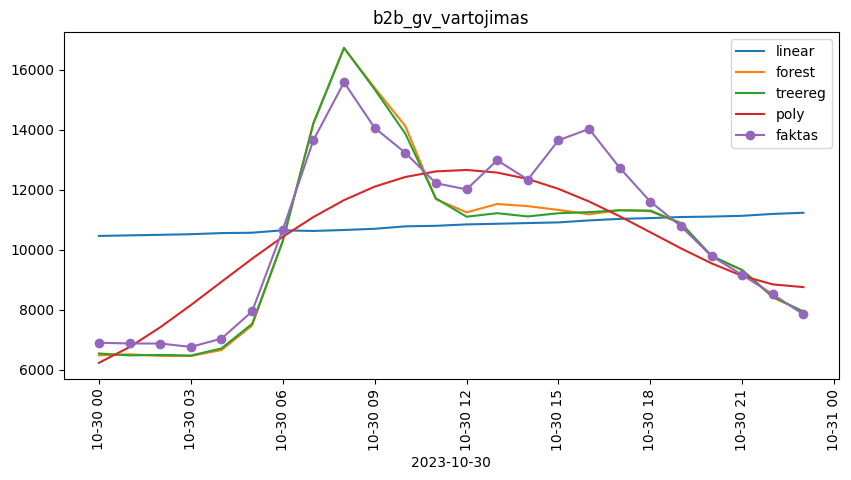

In [16]:


fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(df_train_linear['data_valanda'], df_train_linear['bendras_suvartojimas'], label='linear')
axis.plot(df_train_forest['data_valanda'], df_train_forest['bendras_suvartojimas'], label='forest')
axis.plot(df_train_tree['data_valanda'], df_train_tree['bendras_suvartojimas'], label='treereg')
axis.plot(df_train_poly['data_valanda'], df_train_poly['bendras_suvartojimas'], label='poly')
axis.plot(df_test['data_valanda'], df_test['bendras_suvartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('b2b_gv_vartojimas')
plt.xlabel('2023-10-30')
plt.show()

In [17]:
df2 = pd.read_excel('../../../eismas/b2b_ngv_vartojimas.xlsx')
df2.tail(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
8758,2023-10-31 23:00:00,0.0,0,0.023,0.0,0.0,0.001,0.0,0.020,0.0,...,0.062,0.048,0.015,0.033,0.060,0.017,0.0,0.0,0.0,0.0
8759,2023-11-01 00:00:00,0.0,0,0.020,0.0,0.0,0.000,0.0,0.022,0.0,...,0.062,0.048,0.046,0.031,0.574,0.023,0.0,0.0,0.0,0.0


In [18]:
df2['data_valanda'] = pd.to_datetime(df2['data_valanda'])
df2['bendras_suvartojimas'] = df2.drop('data_valanda', axis=1).sum(axis=1)
df2['hour'] = df2['data_valanda'].dt.hour
df2['day'] = df2['data_valanda'].dt.day_of_week
df2['month'] = df2['data_valanda'].dt.month
df2.tail(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,793,794,795,796,797,798,bendras_suvartojimas,hour,day,month
8758,2023-10-31 23:00:00,0.0,0,0.023,0.0,0.0,0.001,0.0,0.020,0.0,...,0.060,0.017,0.0,0.0,0.0,0.0,448.166477,23,1,10
8759,2023-11-01 00:00:00,0.0,0,0.020,0.0,0.0,0.000,0.0,0.022,0.0,...,0.574,0.023,0.0,0.0,0.0,0.0,420.652829,0,2,11


In [19]:
df2_train = df2.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
# df2_train.tail(3)
df2_test = df2.iloc[-49:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df2_test.tail(2)

,data_valanda,bendras_suvartojimas,hour,day,month
8733,2023-10-30 22:00:00,467.213334,22,0,10
8734,2023-10-30 23:00:00,434.948666,23,0,10


In [20]:
#  forecast linear
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df2_train = df2.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df2_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df2_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    fit = LinearRegression().fit(X_train, y_train)

    # time
    last_datetime = df2_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = fit.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df2_train.index.max() + 1
    df2_train.loc[new_index] = new_row

df2_train_linear = df2_train.tail(24)


In [21]:
#  forecast forest
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df2_train = df2.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df2_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df2_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)

    # time
    last_datetime = df2_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = forest.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df2_train.index.max() + 1
    df2_train.loc[new_index] = new_row
    
df2_train_forest = df2_train.tail(24)

In [22]:
#  forecast tree
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df2_train = df2.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df2_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df2_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = DecisionTreeRegressor(random_state=23)
    regressor.fit(X_train, y_train)

    # time
    last_datetime = df2_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.weekday()
    next_month = next_datetime.month
    

    next_suvartojimas = regressor.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df2_train.index.max() + 1
    df2_train.loc[new_index] = new_row
    
df2_train_tree = df2_train.tail(24)

In [23]:
#  forecast poly
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df2_train = df2.iloc[:-49][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df2_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df2_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    polynomial_features = PolynomialFeatures(degree=4)
    x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

    model = LinearRegression()
    model.fit(x_poly, y)
    # y_poly_pred = model.predict(x_poly)

    # time
    last_datetime = df2_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_input = polynomial_features.transform([[next_hour, next_day, next_month]])
    next_suvartojimas = model.predict(next_input)
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df2_train.index.max() + 1
    df2_train.loc[new_index] = new_row
    
df2_train_poly = df2_train.tail(24)

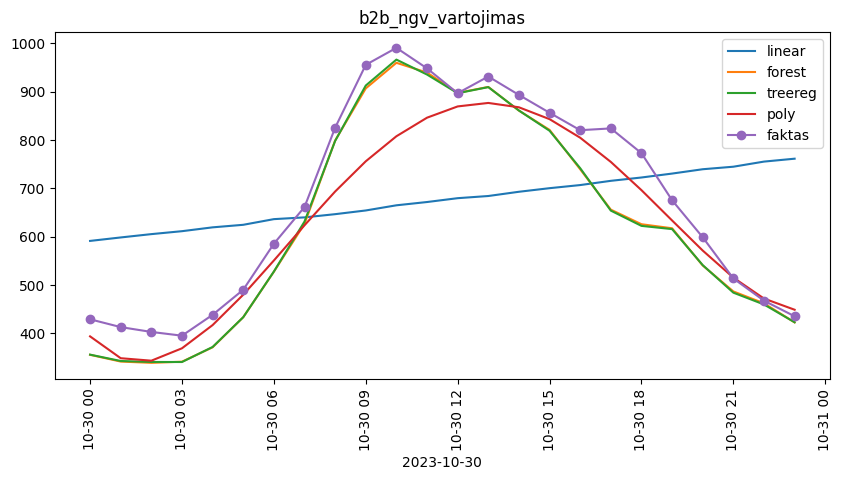

In [24]:
fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(df2_train_linear['data_valanda'], df2_train_linear['bendras_suvartojimas'], label='linear')
axis.plot(df2_train_forest['data_valanda'], df2_train_forest['bendras_suvartojimas'], label='forest')
axis.plot(df2_train_tree['data_valanda'], df2_train_tree['bendras_suvartojimas'], label='treereg')
axis.plot(df2_train_poly['data_valanda'], df2_train_poly['bendras_suvartojimas'], label='poly')
axis.plot(df2_test['data_valanda'], df2_test['bendras_suvartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('b2b_ngv_vartojimas')
plt.xlabel('2023-10-30')
plt.show()

In [25]:
df3 = pd.read_excel('../../../eismas/b2c_gv_vartojimas.xlsx')
df3.tail(2)

,dateTime,0,1,2,3,4,5,6,7,8,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
2183,2023-10-30 23:00:00,0.892,0.809,0.204,1.725,0.556,0.185,0.426,0.657,0.672,...,0.563,0.636,0.111,0.692,0.129,0.176,0.408,0.348,0.282,0.565
2184,2023-10-31 00:00:00,0.856,0.867,0.105,0.328,0.458,0.281,0.414,0.632,0.702,...,0.699,0.740,0.093,0.833,0.849,0.141,0.721,0.250,0.188,0.093


In [26]:
df3 = df3.rename(columns={'dateTime': 'data_valanda'})
df3['data_valanda'] = pd.to_datetime(df3['data_valanda'])
df3['bendras_suvartojimas'] = df3.drop('data_valanda', axis=1).sum(axis=1)
df3['hour'] = df3['data_valanda'].dt.hour
df3['day'] = df3['data_valanda'].dt.day_of_week
df3['month'] = df3['data_valanda'].dt.month
df3.tail(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,1044,1045,1046,1047,1048,1049,bendras_suvartojimas,hour,day,month
2183,2023-10-30 23:00:00,0.892,0.809,0.204,1.725,0.556,0.185,0.426,0.657,0.672,...,0.129,0.176,0.408,0.348,0.282,0.565,811.025201,23,0,10
2184,2023-10-31 00:00:00,0.856,0.867,0.105,0.328,0.458,0.281,0.414,0.632,0.702,...,0.849,0.141,0.721,0.250,0.188,0.093,729.509834,0,1,10


In [27]:
df3_train = df3.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
# df3_train.tail(3)
df3_test = df3.iloc[-25:-1][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df3_test.head(2)

,data_valanda,bendras_suvartojimas,hour,day,month
2160,2023-10-30 00:00:00,745.340335,0,0,10
2161,2023-10-30 01:00:00,683.211501,1,0,10


In [28]:
#  forecast linear
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df3_train = df3.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df3_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df3_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    fit = LinearRegression().fit(X_train, y_train)

    # time
    last_datetime = df3_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = fit.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df3_train.index.max() + 1
    df3_train.loc[new_index] = new_row

df3_train_linear = df3_train.tail(24)


In [29]:
#  forecast forest
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df3_train = df3.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df3_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df3_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)

    # time
    last_datetime = df3_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = forest.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df3_train.index.max() + 1
    df3_train.loc[new_index] = new_row
    
df3_train_forest = df3_train.tail(24)

In [30]:
#  forecast tree
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df3_train = df3.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df3_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df3_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = DecisionTreeRegressor(random_state=23)
    regressor.fit(X_train, y_train)

    # time
    last_datetime = df3_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.weekday()
    next_month = next_datetime.month
    

    next_suvartojimas = regressor.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df3_train.index.max() + 1
    df3_train.loc[new_index] = new_row
    
df3_train_tree = df3_train.tail(24)

In [31]:
#  forecast poly
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df3_train = df3.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df3_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df3_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    polynomial_features = PolynomialFeatures(degree=4)
    x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

    model = LinearRegression()
    model.fit(x_poly, y)
    # y_poly_pred = model.predict(x_poly)

    # time
    last_datetime = df3_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_input = polynomial_features.transform([[next_hour, next_day, next_month]])
    next_suvartojimas = model.predict(next_input)
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df3_train.index.max() + 1
    df3_train.loc[new_index] = new_row
    
df3_train_poly = df3_train.tail(24)

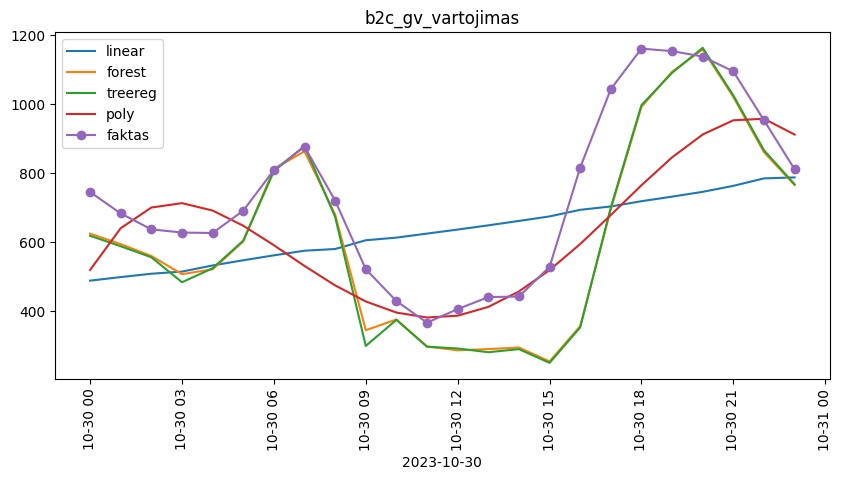

In [32]:
fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(df3_train_linear['data_valanda'], df3_train_linear['bendras_suvartojimas'], label='linear')
axis.plot(df3_train_forest['data_valanda'], df3_train_forest['bendras_suvartojimas'], label='forest')
axis.plot(df3_train_tree['data_valanda'], df3_train_tree['bendras_suvartojimas'], label='treereg')
axis.plot(df3_train_poly['data_valanda'], df3_train_poly['bendras_suvartojimas'], label='poly')
axis.plot(df3_test['data_valanda'], df3_test['bendras_suvartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('b2c_gv_vartojimas')
plt.xlabel('2023-10-30')
plt.show()

In [33]:
df4 = pd.read_excel('../../../eismas/b2c_ngv_vartojimas.xlsx')
df4.tail(2)

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
2183,2023-10-30 23:00:00,0.104,0.253,0.185,0.178,0.148,0.298,0.094,0.201,0.503,...,0.114,0.065,0.617,0.104,0.120,0.171,0.099,0.129,0.037,0.163
2184,2023-10-31 00:00:00,0.045,0.237,0.178,0.122,0.192,0.255,0.110,0.203,0.470,...,0.069,0.097,0.230,0.104,0.117,0.144,0.106,0.062,0.024,0.088


In [34]:
df4 = df4.rename(columns={'dateTime': 'data_valanda'})
df4['data_valanda'] = pd.to_datetime(df4['data_valanda'])
df4['bendras_suvartojimas'] = df4.drop('data_valanda', axis=1).sum(axis=1)
df4['hour'] = df4['data_valanda'].dt.hour
df4['day'] = df4['data_valanda'].dt.day_of_week
df4['month'] = df4['data_valanda'].dt.month
df4.tail(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,1020,1021,1022,1023,1024,1025,bendras_suvartojimas,hour,day,month
2183,2023-10-30 23:00:00,0.104,0.253,0.185,0.178,0.148,0.298,0.094,0.201,0.503,...,0.120,0.171,0.099,0.129,0.037,0.163,190.161001,23,0,10
2184,2023-10-31 00:00:00,0.045,0.237,0.178,0.122,0.192,0.255,0.110,0.203,0.470,...,0.117,0.144,0.106,0.062,0.024,0.088,171.401667,0,1,10


In [35]:
df4_train = df4.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
# df4_train.tail(3)
df4_test = df4.iloc[-25:-1][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
df4_test.tail(2)

,data_valanda,bendras_suvartojimas,hour,day,month
2182,2023-10-30 22:00:00,252.092667,22,0,10
2183,2023-10-30 23:00:00,190.161001,23,0,10


In [36]:
#  forecast linear
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df4_train = df4.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df4_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df4_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    fit = LinearRegression().fit(X_train, y_train)

    # time
    last_datetime = df4_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = fit.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df4_train.index.max() + 1
    df4_train.loc[new_index] = new_row

df4_train_linear = df4_train.tail(24)


In [37]:
#  forecast forest
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df4_train = df4.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df4_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df4_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)

    # time
    last_datetime = df4_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_suvartojimas = forest.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df4_train.index.max() + 1
    df4_train.loc[new_index] = new_row
    
df4_train_forest = df4_train.tail(24)

In [38]:
#  forecast tree
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df4_train = df4.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df4_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df4_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = DecisionTreeRegressor(random_state=23)
    regressor.fit(X_train, y_train)

    # time
    last_datetime = df4_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.weekday()
    next_month = next_datetime.month
    

    next_suvartojimas = regressor.predict(np.reshape([next_hour, next_day, next_month], (1, -1)))
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df4_train.index.max() + 1
    df4_train.loc[new_index] = new_row
    
df4_train_tree = df4_train.tail(24)

In [39]:
#  forecast poly
#  nuo cia!!!!!!!!!!!!!!!!!!!!!!
df4_train = df4.iloc[:-25][['data_valanda', 'bendras_suvartojimas', 'hour', 'day', 'month']]
for i in range(1, 25):
    # apsimokom modelį
    X = df4_train.drop(columns=['bendras_suvartojimas', 'data_valanda' ])
    y = df4_train['bendras_suvartojimas'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    polynomial_features = PolynomialFeatures(degree=4)
    x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

    model = LinearRegression()
    model.fit(x_poly, y)
    # y_poly_pred = model.predict(x_poly)

    # time
    last_datetime = df4_train['data_valanda'].iloc[-1]
    next_datetime = last_datetime + pd.Timedelta(hours=1)
    next_hour = next_datetime.hour
    next_day = next_datetime.day_of_week
    next_month = next_datetime.month
    

    next_input = polynomial_features.transform([[next_hour, next_day, next_month]])
    next_suvartojimas = model.predict(next_input)
    # print(next_temp)
    new_row = {'data_valanda': next_datetime,
                'bendras_suvartojimas': float(next_suvartojimas),
                'hour': next_hour,
                'day': next_day,
                'month': next_month}
    
    new_index = df4_train.index.max() + 1
    df4_train.loc[new_index] = new_row
    
df4_train_poly = df4_train.tail(24)

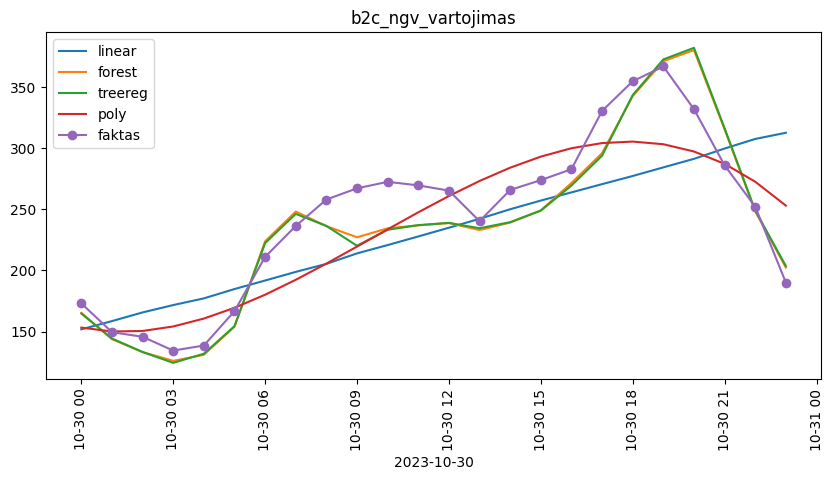

In [40]:
fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(df4_train_linear['data_valanda'], df4_train_linear['bendras_suvartojimas'], label='linear')
axis.plot(df4_train_forest['data_valanda'], df4_train_forest['bendras_suvartojimas'], label='forest')
axis.plot(df4_train_tree['data_valanda'], df4_train_tree['bendras_suvartojimas'], label='treereg')
axis.plot(df4_train_poly['data_valanda'], df4_train_poly['bendras_suvartojimas'], label='poly')
axis.plot(df4_test['data_valanda'], df4_test['bendras_suvartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('b2c_ngv_vartojimas')
plt.xlabel('2023-10-30')
plt.show()

In [41]:
# susimažinam lenteles

df_train_linear_a = df_train_linear[['data_valanda', 'bendras_suvartojimas']]
df2_train_linear_a = df2_train_linear[['data_valanda', 'bendras_suvartojimas']]
df3_train_linear_a = df3_train_linear[['data_valanda', 'bendras_suvartojimas']]
df4_train_linear_a = df4_train_linear[['data_valanda', 'bendras_suvartojimas']]

df_train_forest_a = df_train_forest[['data_valanda', 'bendras_suvartojimas']]
df2_train_forest_a = df2_train_forest[['data_valanda', 'bendras_suvartojimas']]
df3_train_forest_a = df3_train_forest[['data_valanda', 'bendras_suvartojimas']]
df4_train_forest_a = df4_train_forest[['data_valanda', 'bendras_suvartojimas']]

df_train_tree_a = df_train_tree[['data_valanda', 'bendras_suvartojimas']]
df2_train_tree_a = df2_train_tree[['data_valanda', 'bendras_suvartojimas']]
df3_train_tree_a = df3_train_tree[['data_valanda', 'bendras_suvartojimas']]
df4_train_tree_a = df4_train_tree[['data_valanda', 'bendras_suvartojimas']]

df_train_poly_a = df_train_poly[['data_valanda', 'bendras_suvartojimas']]
df2_train_poly_a = df2_train_poly[['data_valanda', 'bendras_suvartojimas']]
df3_train_poly_a = df3_train_poly[['data_valanda', 'bendras_suvartojimas']]
df4_train_poly_a = df4_train_poly[['data_valanda', 'bendras_suvartojimas']]

df_test_a = df_test[['data_valanda', 'bendras_suvartojimas']]
df2_test_a = df2_test[['data_valanda', 'bendras_suvartojimas']]
df3_test_a = df3_test[['data_valanda', 'bendras_suvartojimas']]
df4_test_a = df4_test[['data_valanda', 'bendras_suvartojimas']]


In [42]:
# pervadiname stulpelį, kad galėtume jungti lenteles
df_train_linear_a = df_train_linear_a.rename(columns={'bendras_suvartojimas': 'vartojimas1'})
df2_train_linear_a = df2_train_linear_a.rename(columns={'bendras_suvartojimas': 'vartojimas2'})
df3_train_linear_a = df3_train_linear_a.rename(columns={'bendras_suvartojimas': 'vartojimas3'})
df4_train_linear_a = df4_train_linear_a.rename(columns={'bendras_suvartojimas': 'vartojimas4'})

df_train_forest_a = df_train_forest_a.rename(columns={'bendras_suvartojimas': 'vartojimas1'})
df2_train_forest_a = df2_train_forest_a.rename(columns={'bendras_suvartojimas': 'vartojimas2'})
df3_train_forest_a = df3_train_forest_a.rename(columns={'bendras_suvartojimas': 'vartojimas3'})
df4_train_forest_a = df4_train_forest_a.rename(columns={'bendras_suvartojimas': 'vartojimas4'})

df_train_tree_a = df_train_tree_a.rename(columns={'bendras_suvartojimas': 'vartojimas1'})
df2_train_tree_a = df2_train_tree_a.rename(columns={'bendras_suvartojimas': 'vartojimas2'})
df3_train_tree_a = df3_train_tree_a.rename(columns={'bendras_suvartojimas': 'vartojimas3'})
df4_train_tree_a = df4_train_tree_a.rename(columns={'bendras_suvartojimas': 'vartojimas4'})

df_train_poly_a = df_train_poly_a.rename(columns={'bendras_suvartojimas': 'vartojimas1'})
df2_train_poly_a = df2_train_poly_a.rename(columns={'bendras_suvartojimas': 'vartojimas2'})
df3_train_poly_a = df3_train_poly_a.rename(columns={'bendras_suvartojimas': 'vartojimas3'})
df4_train_poly_a = df4_train_poly_a.rename(columns={'bendras_suvartojimas': 'vartojimas4'})

df_test_a = df_test_a.rename(columns={'bendras_suvartojimas': 'vartojimas1'})
df2_test_a = df2_test_a.rename(columns={'bendras_suvartojimas': 'vartojimas2'})
df3_test_a = df3_test_a.rename(columns={'bendras_suvartojimas': 'vartojimas3'})
df4_test_a = df4_test_a.rename(columns={'bendras_suvartojimas': 'vartojimas4'})


In [43]:
# lentelių jungimas
merged_linear = pd.merge(df_train_linear_a, df2_train_linear_a, on='data_valanda', how='inner')
merged_linear = pd.merge(merged_linear, df3_train_linear_a, on='data_valanda', how='inner')
merged_linear = pd.merge(merged_linear, df4_train_linear_a, on='data_valanda', how='inner')

merged_forest = pd.merge(df_train_forest_a, df2_train_forest_a, on='data_valanda', how='inner')
merged_forest = pd.merge(merged_forest, df3_train_forest_a, on='data_valanda', how='inner')
merged_forest = pd.merge(merged_forest, df4_train_forest_a, on='data_valanda', how='inner')

merged_tree = pd.merge(df_train_tree_a, df2_train_tree_a, on='data_valanda', how='inner')
merged_tree = pd.merge(merged_tree, df3_train_tree_a, on='data_valanda', how='inner')
merged_tree = pd.merge(merged_tree, df4_train_tree_a, on='data_valanda', how='inner')

merged_poly = pd.merge(df_train_poly_a, df2_train_poly_a, on='data_valanda', how='inner')
merged_poly = pd.merge(merged_poly, df3_train_poly_a, on='data_valanda', how='inner')
merged_poly = pd.merge(merged_poly, df4_train_poly_a, on='data_valanda', how='inner')

merged_test = pd.merge(df_test_a, df2_test_a, on='data_valanda', how='inner')
merged_test = pd.merge(merged_test, df3_test_a, on='data_valanda', how='inner')
merged_test = pd.merge(merged_test, df4_test_a, on='data_valanda', how='inner')



In [44]:
# skaičiuojam bendrą (4 failų) suvartojimą
merged_linear['bendras_suvartojimas'] = merged_linear.drop('data_valanda', axis=1).sum(axis=1)
merged_forest['bendras_suvartojimas'] = merged_forest.drop('data_valanda', axis=1).sum(axis=1)
merged_tree['bendras_suvartojimas'] = merged_tree.drop('data_valanda', axis=1).sum(axis=1)
merged_poly['bendras_suvartojimas'] = merged_poly.drop('data_valanda', axis=1).sum(axis=1)
merged_test['bendras_suvartojimas'] = merged_test.drop('data_valanda', axis=1).sum(axis=1)


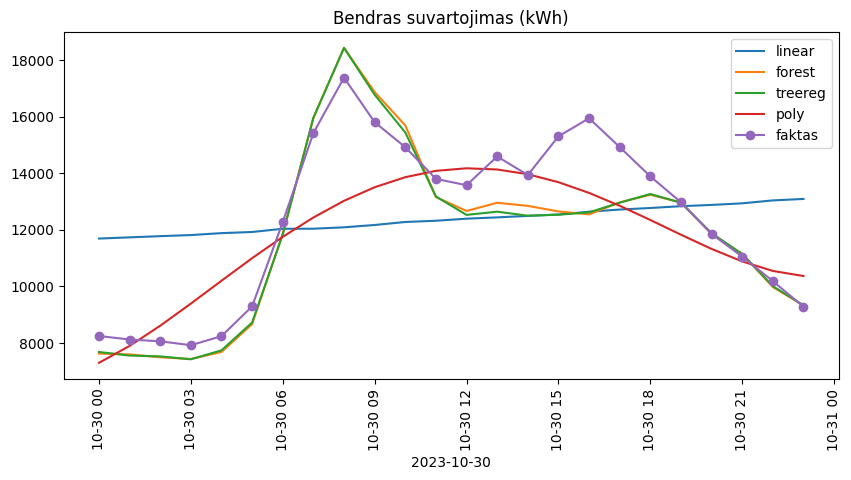

In [46]:
fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(merged_linear['data_valanda'], merged_linear['bendras_suvartojimas'], label='linear')
axis.plot(merged_forest['data_valanda'], merged_forest['bendras_suvartojimas'], label='forest')
axis.plot(merged_tree['data_valanda'], merged_tree['bendras_suvartojimas'], label='treereg')
axis.plot(merged_poly['data_valanda'], merged_poly['bendras_suvartojimas'], label='poly')
axis.plot(merged_test['data_valanda'], merged_test['bendras_suvartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('Bendras suvartojimas (kWh)')
plt.xlabel('2023-10-30')
plt.show()